In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sstats
from glob import glob
import numpy as np

In [2]:
example_data = pd.read_csv('ssrt_metrics/indiv_guesses.csv', index_col=0)
example_data.columns = example_data.columns.str.replace('SSRT_', '')
melt_df = pd.melt(example_data, id_vars=['SSD'], value_vars=['SSRT','w_guesses','w_graded'], var_name = 'assumed_go_dist', value_name='SSRT')

In [3]:
example_data

,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD,w_guesses,w_graded
0,390.0,0.0,0.300200,2835.0,510.074648,250.757903,0,0.0,NaN,NaN,0.0,293.736462,664.0
1,376.0,50.0,0.389424,2835.0,510.074648,273.015415,0,0.0,NaN,NaN,50.0,287.016716,686.0
2,352.0,100.0,0.452896,2835.0,510.074648,300.938390,0,0.0,NaN,NaN,100.0,286.675783,1180.0
3,331.0,150.0,0.520200,2835.0,510.074648,327.939384,0,0.0,NaN,NaN,150.0,283.000000,303.0
4,311.0,200.0,0.585544,2835.0,510.074648,358.176865,0,0.0,NaN,NaN,200.0,282.000000,46.0
5,301.0,250.0,0.659856,2835.0,510.074648,381.922188,0,0.0,NaN,NaN,250.0,281.000000,122.0
6,295.0,300.0,0.730408,2835.0,510.074648,404.284592,0,0.0,NaN,NaN,300.0,282.000000,206.0
7,288.0,350.0,0.787440,2835.0,510.074648,424.087584,0,0.0,NaN,NaN,350.0,280.000000,361.0
8,284.0,400.0,0.836488,2835.0,510.074648,439.547447,0,0.0,NaN,NaN,400.0,279.000000,340.0
9,280.0,450.0,0.875024,2835.0,510.074648,453.660286,0,0.0,NaN,NaN,450.0,277.000000,316.0


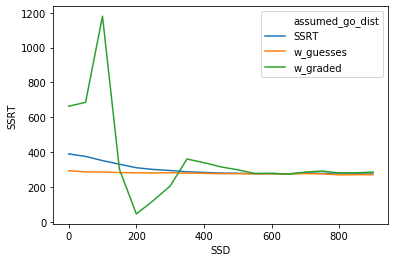

In [4]:
_ = sns.lineplot(x='SSD', y='SSRT', hue='assumed_go_dist', data=melt_df)

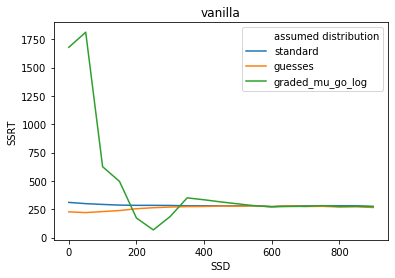

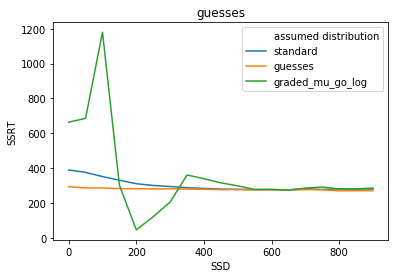

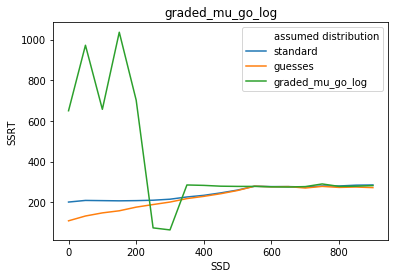

In [5]:
full_metric_df = pd.DataFrame()

full_melt = pd.DataFrame()

for file in [i for i in glob('ssrt_metrics/indiv_*.csv') if 'linear' not in i]:
    title = file.split('indiv_')[-1].replace('.csv', '')
    data =  pd.read_csv(file, index_col=0)
    data.columns = data.columns.str.replace('SSRT_', '')
    data = data.rename(columns={'SSRT': 'standard', 'w_guesses': 'guesses', 'w_graded': 'graded_mu_go_log'})
    melt_df = pd.melt(data, id_vars=['SSD'], value_vars=['standard','guesses','graded_mu_go_log'], var_name = 'assumed distribution', value_name='SSRT')
    melt_df['underlying distribution'] = title
    full_melt = pd.concat([full_melt, melt_df], 0)
    
    
    _ = sns.lineplot(x='SSD', y='SSRT', hue='assumed distribution', data=melt_df)
    
    plt.title(title)
    plt.show()
    plt.close()
    
    # for inhibition function
    data['underlying distribution'] = title
    full_metric_df = pd.concat([full_metric_df, data], 0)
#     curr_series = data.loc[:,['mean_SSD', 'p_respond']].set_index('mean_SSD').add_prefix(title+'_')
#     p_respond_df = pd.concat([p_respond_df, curr_series], 1)

In [6]:
full_metric_df

,standard,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD,guesses,graded_mu_go_log,underlying distribution
0,310.0,0.0,0.118272,2060.0,510.485392,305.528544,0,0.0,NaN,NaN,0.0,226.387285,1679.0,vanilla
1,299.0,50.0,0.201848,2060.0,510.485392,321.227141,0,0.0,NaN,NaN,50.0,220.000000,1812.0,vanilla
2,292.0,100.0,0.307336,2060.0,510.485392,339.515996,0,0.0,NaN,NaN,100.0,229.004583,625.0,vanilla
3,286.0,150.0,0.417448,2060.0,510.485392,358.956114,0,0.0,NaN,NaN,150.0,238.000000,495.0,vanilla
4,284.0,200.0,0.527224,2060.0,510.485392,379.204664,0,0.0,NaN,NaN,200.0,254.000000,172.0,vanilla
5,284.0,250.0,0.627376,2060.0,510.485392,397.922866,0,0.0,NaN,NaN,250.0,263.000000,67.0,vanilla
6,283.0,300.0,0.710680,2060.0,510.485392,416.076186,0,0.0,NaN,NaN,300.0,269.000000,186.0,vanilla
7,280.0,350.0,0.776896,2060.0,510.485392,430.886863,0,0.0,NaN,NaN,350.0,273.000000,350.0,vanilla
8,280.0,400.0,0.830272,2060.0,510.485392,445.436975,0,0.0,NaN,NaN,400.0,274.000000,333.0,vanilla
9,280.0,450.0,0.873656,2060.0,510.485392,456.590310,0,0.0,NaN,NaN,450.0,278.000000,314.0,vanilla


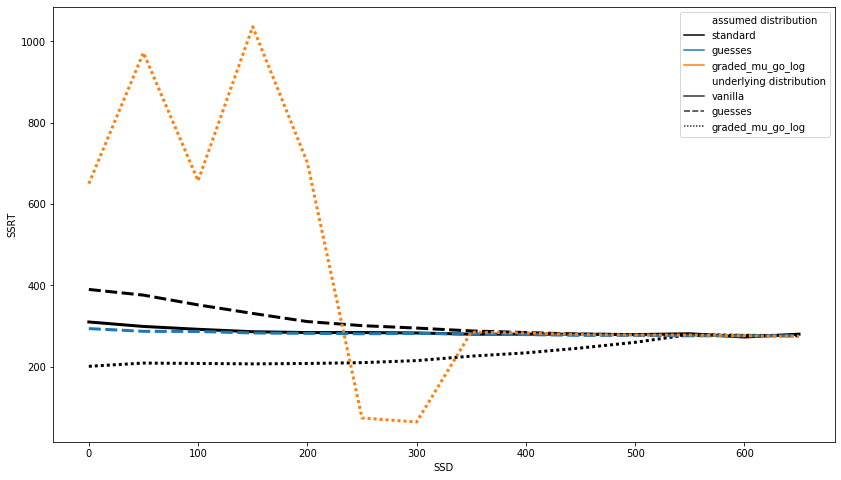

In [7]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
keep_idx = ((full_melt['assumed distribution'] == 'standard') | (full_melt['assumed distribution'] == full_melt['underlying distribution'])) & (full_melt['SSD'] <= 650)
_ = sns.lineplot(x='SSD', y='SSRT', hue='assumed distribution', style='underlying distribution', data=full_melt[keep_idx], palette=['k', '#1f77b4', '#ff7f0e'], linewidth=3)
plt.savefig('SSRT_by_SSD_supplement.pdf')


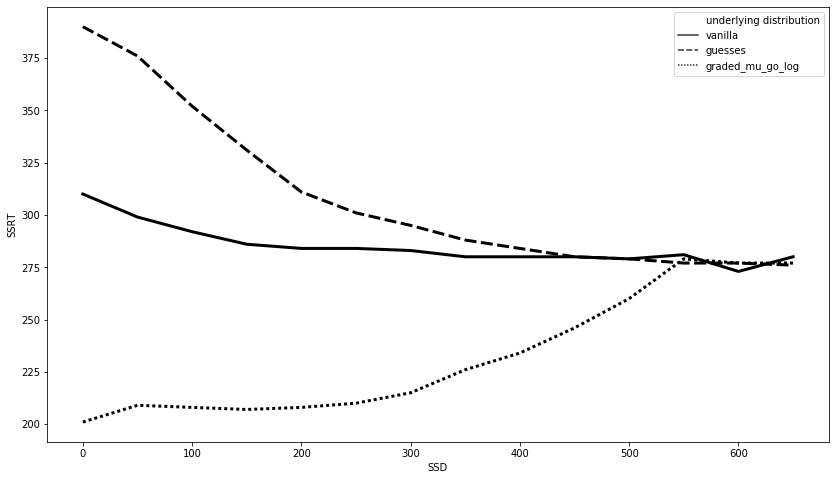

In [8]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
_ = sns.lineplot(x='SSD', y='SSRT', color='k', style='underlying distribution', data=full_melt[(full_melt['assumed distribution'] == 'standard') & (full_melt['SSD'] <= 650)], linewidth=3)
plt.savefig('SSRT_by_SSD.pdf')

# Inhibition Function

In [9]:
def get_p_resp_per_SSD(data, SSDs):
    data = data.copy()
    out_dict = {}
    for ssd in SSDs:
        curr_data = data.query(
            "SSDDur == %s" % ssd
        )
        if len(curr_data) == 0:
            out_dict[ssd] = np.nan
        else:
            out_dict[ssd] = len(curr_data.query("correct_stop == 0.0")) / len(curr_data)
    return out_dict

In [10]:
abcd_data = pd.read_csv('abcd_data/minimal_abcd_no_issue_3.csv')
SSDs = [i for i in abcd_data.SSDDur.unique() if i==i]
ssd_resp_dict = abcd_data.groupby('NARGUID').apply(get_p_resp_per_SSD, SSDs)
ssd_resp_df = ssd_resp_dict.apply(pd.Series)

In [11]:
abcd_inhib_func = pd.DataFrame(ssd_resp_df.mean())
abcd_inhib_func.index.name = 'SSD'
abcd_inhib_func.columns = ['p_respond']
abcd_inhib_func = abcd_inhib_func.reset_index()
abcd_inhib_func['underlying distribution'] = 'ABCD data'

In [12]:
abcd_data.query("NARGUID=='00LJVZK2' and SSDDur==800")

,NARGUID,go_rt_adjusted,stop_rt_adjusted,trial_type,SSDDur,correct_go_response,correct_stop,SSD.RESP,Fix.RESP,StopSignal.RESP,Go.RESP,TrialNum,correct_stimulus_mapping_1,correct_stimulus_mapping_2,finger_press,choice_accuracy
1221470,00LJVZK2,NaN,0.0,StopTrial,800.0,NaN,1.0,NaN,NaN,NaN,NaN,351,3.0,2.0,NaN,0.0


In [13]:
ssd_resp_df[ssd_resp_df[900].notnull()]

SSD,50.0,100.0,0.0,150.0,200.0,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,650.0,700.0,750.0,800.0,850.0,900.0
NARGUID,,,,,,,,,,,,,,,,,,,
01ELX9L6,0.000000,0.0,NaN,0.333333,0.5,0.000000,0.500,0.083333,0.625000,0.833333,0.000000,0.000000,0.0,0.5,0.000000,0.000000,0.000000,0.000000,0.000000
06U4DYFY,0.500000,0.4,0.50000,0.666667,0.5,0.500000,0.500,0.500000,0.333333,0.666667,0.500000,0.500000,0.5,0.5,0.500000,0.500000,0.333333,0.666667,0.125000
08J0E48V,0.000000,0.0,NaN,0.000000,0.0,0.000000,0.000,0.125000,0.600000,0.500000,0.285714,0.666667,1.0,0.0,0.000000,0.000000,0.000000,0.400000,1.000000
0NGG5VLJ,0.857143,0.0,0.73913,0.000000,0.0,0.600000,0.500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.166667
0X38WL5R,0.000000,0.0,NaN,0.000000,0.0,0.000000,0.000,0.000000,0.166667,0.666667,0.500000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YT7M0T6Y,0.000000,0.0,NaN,0.000000,0.0,0.555556,0.500,0.400000,0.666667,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Z8JVVCW2,0.000000,0.0,NaN,0.000000,0.0,0.500000,0.375,0.571429,0.333333,0.750000,0.000000,0.000000,0.0,0.0,0.333333,0.500000,0.000000,0.333333,0.250000
ZL9DL58E,0.000000,0.0,NaN,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.500000,0.500000,0.000000,0.0,0.0,0.250000,0.375000,0.555556,0.500000,0.416667


In [14]:
inhib_func_df = pd.concat([full_metric_df[['SSD', 'p_respond', 'underlying distribution']], abcd_inhib_func], 0)

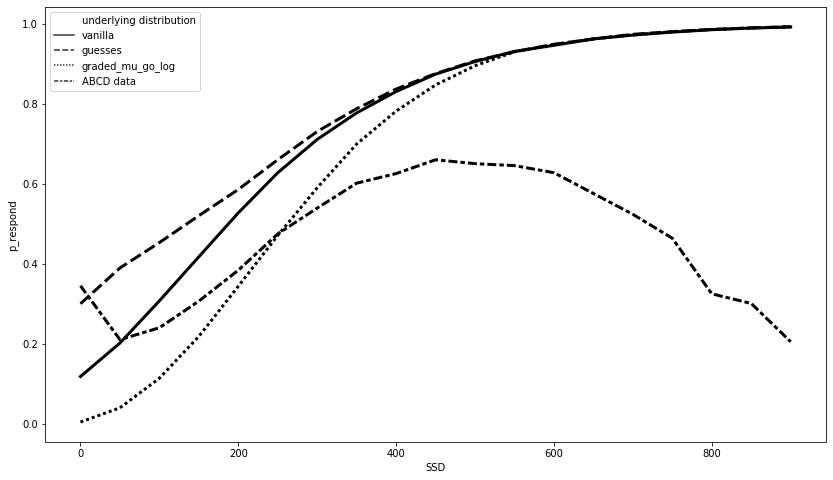

In [15]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
_ = sns.lineplot(x='SSD', y='p_respond', color='k', style='underlying distribution', data=inhib_func_df, linewidth=3)
# plt.savefig('SSRT_by_SSD.pdf')